## TF Dataset

In [ ]:
%cd /content/drive/MyDrive/PMDL/PMDL Project /Moscow DS/content/MSCOCO_TRAIN2017_RESIZED
import os

/content/drive/MyDrive/PMDL/PMDL Project /Moscow DS/content/MSCOCO_TRAIN2017_RESIZED


In [ ]:
tr_files=os.listdir(".")

In [ ]:
def img_data(img_paths,size):
  data=tf.data.Dataset.from_tensor_slices(img_paths)
  data=data.map(tf.io.read_file)
  data=data.map(lambda x: tf.image.decode_jpeg(x,channels=3),num_parallel_calls=AUTOTUNE)
  data = data.map(lambda x: tf.image.resize(x, (size, size)))

  return data

def y_imgs(y_img_files):
  y_ds=img_data(y_img_files,128)
  return y_ds

def x_imgs(x_img_files):
  x_ds=img_data(x_img_files,64)
  return x_ds


In [ ]:
tf.config.run_functions_eagerly(True)

def dataset(x_files,y_files,batch_size=32,repeat_count=None):
  x_data=x_imgs(x_files)
  y_data=y_imgs(y_files)
  data=tf.data.Dataset.zip((x_data,y_data))
  data=data.batch(batch_size)
  data=data.repeat(repeat_count)
  data=data.prefetch(buffer_size=AUTOTUNE)
  return data

from tensorflow.python.data.experimental import AUTOTUNE

n_epochs=100
batch_size=128
n_batches=len(tr_files)//batch_size
training_data=dataset(tr_files,tr_files,batch_size=batch_size)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [ ]:
ckpt = k.callbacks.ModelCheckpoint( "/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDSR_flowers_deep_PaperParams2.h5")

In [ ]:
#edsr.save_weights("/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDSR_flowers_deep_PaperParams2_wtsonly.h5")

In [ ]:
edsr.fit(training_data,epochs=n_epochs,batch_size=batch_size,steps_per_epoch=n_batches,callbacks=[ckpt])

Epoch 1/100
122/122 [==============================] - 12448s 102s/step - loss: 10.7134
Epoch 2/100
122/122 [==============================] - 81s 660ms/step - loss: 10.6306
Epoch 3/100
122/122 [==============================] - 80s 654ms/step - loss: 10.6057
Epoch 4/100
122/122 [==============================] - 80s 654ms/step - loss: 10.5609
Epoch 5/100
122/122 [==============================] - 80s 659ms/step - loss: 10.5402
Epoch 6/100
122/122 [==============================] - 80s 652ms/step - loss: 10.5263
Epoch 7/100
122/122 [==============================] - 80s 654ms/step - loss: 10.4775
Epoch 8/100
122/122 [==============================] - 80s 656ms/step - loss: 10.4592
Epoch 9/100
122/122 [==============================] - 80s 658ms/step - loss: 10.4581
Epoch 10/100
122/122 [==============================] - 80s 652ms/step - loss: 10.4244
Epoch 11/100
122/122 [==============================] - 79s 651ms/step - loss: 10.4047
Epoch 12/100
122/122 [============================

In [ ]:
xt=imread("/content/0851x4-crop.png").astype(np.float32)

In [ ]:

xt=imread("/content/Dev2K_train_327.jpg").astype(np.float32)

(251, 257, 4)

In [ ]:
x,y=next(iter(training_data))

In [ ]:
yp=edsr.predict(xt.reshape(1,xt.shape[0],xt.shape[1],xt.shape[2]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [ ]:

def plot_sample(lr, sr):
    plt.figure(figsize=(20, 10))

    images = [lr, sr]
    titles = ['LR', f'SR (x{sr.shape[0] // lr.shape[0]})']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


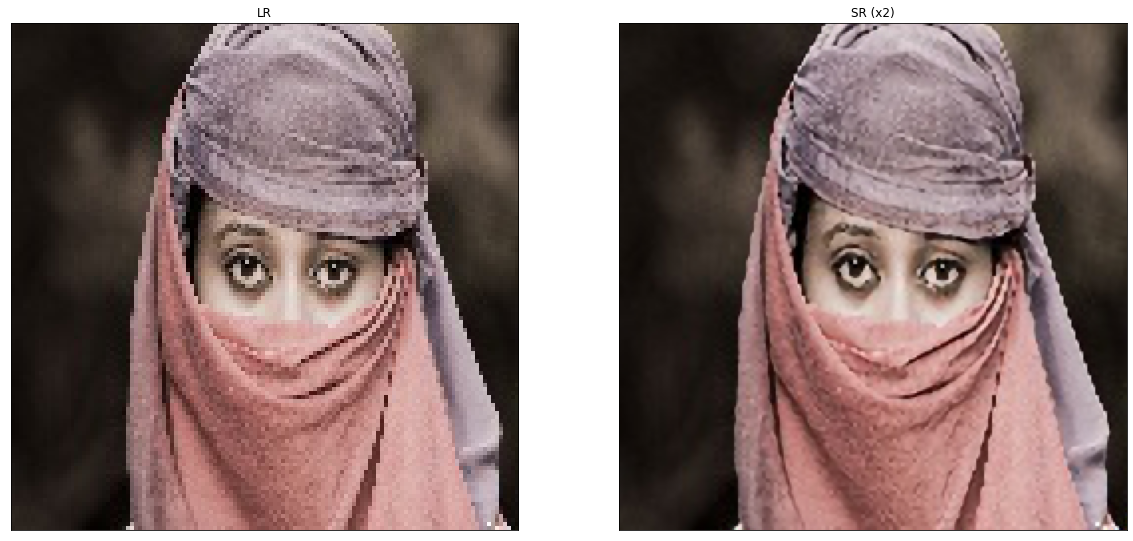

In [ ]:
plot_sample(xt.astype(np.int32),tf.cast(yp[0],tf.int32))

In [ ]:
import matplotlib.pyplot as plt


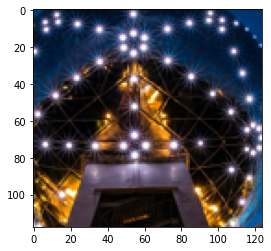

In [ ]:
plt.imshow((xt.astype(np.int32)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


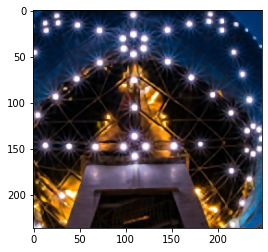

In [ ]:
plt.imshow(tf.cast(yp[0],tf.int32))

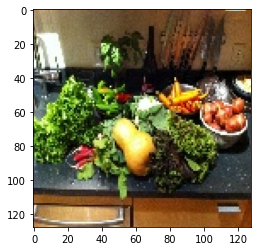

In [ ]:
plt.imshow(tf.cast(y[0],tf.int32))

## ImageGenerator

In [ ]:
%cd /content/drive/MyDrive/PMDL/PMDL Project /Flowers photos

/content/drive/MyDrive/PMDL/PMDL Project /Flowers photos


In [ ]:
from skimage.io import imread
from skimage.transform import rescale, resize
import numpy as np
import pandas as pd
import os

In [ ]:
DIV2K_RGB_MEAN = np.array([0.4488, 0.4371, 0.4040]) *255


In [ ]:
def x_img(path):
  return imread(path)



In [ ]:

def y_img( path ):
  return imread(path)

In [ ]:
def preprocess_x(img):
  img=resize(img,(64,64))*255
  img=np.array(img).astype(np.float32)

  return img

In [ ]:
def preprocess_y(img):
  img=resize(img,(128,128))*255
  img=np.array(img).astype(np.float32)
  return img

In [ ]:
def data_generator(files_x,files_y, batch_size = 64):
    
    while True:
          # Select files (paths/indices) for the batch
          files_x=np.asarray(files_x)
          files_y=np.asarray(files_y)

          inds=np.random.randint(0,len(files_x),size=batch_size)

          x_batch_paths=files_x[inds]
          y_bathc_paths=files_y[inds]
          #batch_paths  = np.random.choice(a    = files_x, 
           #                               size = batch_size)
          batch_input  = []
          batch_output = [] 
          
          # Read in each input, perform preprocessing and get labels
          for path in x_batch_paths:
              x_im=x_img(path )
              y_im = y_img(path)
            
              x = preprocess_x(x_im)
              y = preprocess_y(y_im)

              batch_input += [ x ]
              batch_output += [ y ]
          # Return a tuple of (input, output) to feed the network
          batch_x = np.array( batch_input )
          batch_y = np.array( batch_output )
        
          yield( batch_x, batch_y )

##EDSR Resnet Code

In [ ]:
import tensorflow as tf


In [ ]:
k=tf.keras
ly=k.layers

In [ ]:
def normalize(x):
  return (x-DIV2K_RGB_MEAN)/ 127.5

def denormalize(x):
  return x*127.5+DIV2K_RGB_MEAN

In [ ]:
def res_block(xin,scale=1,n_filters=64):
  
  x=ly.Conv2D(n_filters,3,activation='relu',padding='same')(xin)
  x=ly.Conv2D(n_filters,3,padding='same')(x)
  x=ly.Conv2D(n_filters,3,padding='same')(x)

  out=ly.Add()([xin,x])
  return out

In [ ]:
def EDSR(n_filters=64,num_resblocks=16,scale=2):
  xin=ly.Input(shape=(None,None,3))
  x=ly.Lambda(normalize)(xin)
  x=ly.Conv2D(n_filters,3,padding='same')(xin)
  x=x_res=ly.Conv2D(n_filters,3,padding='same')(x)
  for i in range(num_resblocks):
    x_res=res_block(x_res)
  
  x_res=ly.Conv2D(n_filters,3,padding='same')(x_res)
  x=ly.Add()([x_res,x])

  x=ly.Conv2D(n_filters,3,padding='same')(x)
  #upsample layer
  x = ly.Conv2D(n_filters * (scale ** 2), 3, padding='same')(x)
  x= ly.Lambda(lambda t: tf.nn.depth_to_space(t,scale))(x)

  x=ly.Conv2D(3,3,padding='same')(x)
  x=ly.Lambda(denormalize)(x)

  return k.Model(xin,x,name='EDSR')







In [ ]:
edsr=EDSR()

In [ ]:
edsr.summary()

Model: "EDSR"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_395 (Conv2D)             (None, None, None, 1 3584        input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_396 (Conv2D)             (None, None, None, 1 147584      conv2d_395[0][0]                 
__________________________________________________________________________________________________
conv2d_397 (Conv2D)             (None, None, None, 1 147584      conv2d_396[0][0]                 
_______________________________________________________________________________________________

In [ ]:
%cd /content/drive/MyDrive/PMDL/PMDL Project /Resized Imgs/content/Images_resized

/content/drive/MyDrive/PMDL/PMDL Project /Resized Imgs/content/Images_resized


In [ ]:
import os
new_dir="/content/drive/MyDrive/PMDL/PMDL Project /Resized Imgs/content/Images_resized"
file_paths=os.listdir(new_dir)

In [ ]:
len(list(reversed(sorted(file_paths))))

6472

In [ ]:
data_gen=data_generator(file_paths,file_paths,128)

In [ ]:
edsr.compile(loss=k.losses.MeanAbsoluteError(),optimizer=k.optimizers.Nadam(learning_rate=1e-4))

In [ ]:
ckpt = k.callbacks.ModelCheckpoint( "/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDSR_flowers_deep_PaperParams.h5")

In [ ]:
edsr.fit(data_gen,steps_per_epoch=6472//128,epochs=100,callbacks=[ckpt])

In [ ]:
x=next(gen)

In [ ]:
x[0]

In [ ]:
k.models.save_model(edsr,"EDSR_flowers_deep.h5")

In [ ]:
edsr=k.models.load_model("/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDSR_flowers_deep_PaperParams.h5")

In [ ]:
x=next(data_gen)

In [ ]:
y=edsr.predict(x)

In [ ]:
y[4]

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(y[55].astype(np.int32),vmin=0,vmax=255)

In [ ]:
plt.imshow(x[0][55].astype(np.int32))

In [ ]:
x=imread("/content/drive/MyDrive/PMDL/PMDL Project /seg_train/forest/10030.jpg")

In [ ]:
x=x.astype(np.float32)

In [ ]:
x

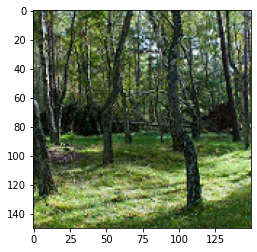

In [ ]:
plt.imshow(x)

In [ ]:
x.shape

(150, 150, 3)

In [ ]:
y_s=generator.predict(tf.reshape(xs,(1,472,496,3)))

In [ ]:
xs=resolve_single(generator,x)

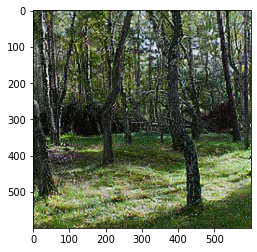

In [ ]:
plt.imshow(xs.numpy())

In [ ]:
y_s

In [ ]:
cd interl\ images

/content/drive/MyDrive/PMDL/PMDL Project /interl images
